<a href="https://colab.research.google.com/github/amilafr/algo-python-pro/blob/main/M5L4_The_Fast_Clicker_game_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Fast Clicker game. Part 2

[PPT M5L4](https://docs.google.com/presentation/d/1cEHJmxNbcWvEA2_UTPMIbbAtsts5oKbuPSDWMQkWfAo/edit?usp=sharing)

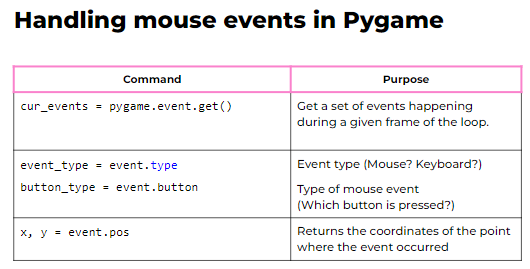

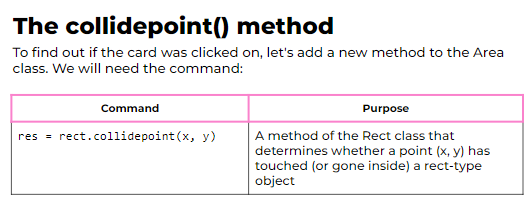

In [ ]:
import pygame
import time
pygame.init()

'''creating the program window'''
back = (200, 255, 255) ##background color
mw = pygame.display.set_mode((500, 500)) #main window
mw.fill(back)
clock = pygame.time.Clock()

'''Rectangle class'''
class Area():
  def __init__(self, x=0, y=0, width=10, height=10, color=None):
      self.rect = pygame.Rect(x, y, width, height)
      self.fill_color = color
  def color(self, new_color):
      self.fill_color = new_color
  def fill(self):
      pygame.draw.rect(mw, self.fill_color, self.rect)
  def outline(self, frame_color, thickness):  #outline of an existing rectangle
      pygame.draw.rect(mw, frame_color, self.rect, thickness)
  def collidepoint(self, x, y):
      return self.rect.collidepoint(x, y)

'''Class label'''
class Label(Area):
  def set_text(self, text, fsize=12, text_color=(0, 0, 0)):
      self.image = pygame.font.SysFont('verdana', fsize).render(text, True, text_color)
  def draw(self, shift_x=0, shift_y=0):
      self.fill()
      mw.blit(self.image, (self.rect.x + shift_x, self.rect.y + shift_y))

RED = (255, 0, 0)
GREEN = (0, 255, 51)
YELLOW = (255, 255, 0)
DARK_BLUE = (0, 0, 100)
BLUE = (80, 80, 255)
LIGHT_GREEN = (200, 255, 200)
LIGHT_RED = (250, 128, 114)
cards = []
num_cards = 4
x = 70


start_time = time.time()
cur_time = start_time


''' Game interface'''


time_text = Label(0,0,50,50,back)
time_text.set_text('Time:',40, DARK_BLUE)
time_text.draw(20, 20)


timer = Label(50,55,50,40,back)
timer.set_text('0', 40, DARK_BLUE)
timer.draw(0,0)


score_text = Label(380,0,50,50,back)
score_text.set_text('Count:',45, DARK_BLUE)
score_text.draw(20,20)


score = Label(430,55,50,40,back)
score.set_text('0', 40, DARK_BLUE)
score.draw(0,0)


for i in range(num_cards):
  new_card = Label(x, 170, 70, 100, YELLOW)
  new_card.outline(BLUE, 10)
  new_card.set_text('CLICK', 26)
  cards.append(new_card)
  x = x + 100
wait = 0
points = 0


from random import randint

while True:
  '''Drawing cards and displaying clicks'''
  if wait == 0:
      wait = 20 #so many ticks the label will be in one place
      click = randint(1, num_cards)
      for i in range(num_cards):
          cards[i].color(YELLOW)
          if (i + 1) == click:
              cards[i].draw(10, 40)
          else:
              cards[i].fill()
  else:
      wait -= 1
  '''Handling clicks on cards'''
  for event in pygame.event.get():
      if event.type == pygame.MOUSEBUTTONDOWN and event.button == 1:
          x, y = event.pos
          for i in range(num_cards):
              if cards[i].collidepoint(x,y):
                  if i + 1 == click:# if there is a label on the card, we color it green, add a point
                      cards[i].color(GREEN)
                      points += 1
                  else: #otherwise color it red, minus a point
                      cards[i].color(RED)
                      points -= 1
                  cards[i].fill()
                  score.set_text(str(points),40, DARK_BLUE)
                  score.draw(0,0)
  '''Winning and losing'''
  new_time = time.time()


  if new_time - start_time  >= 11:
       win = Label(0, 0, 500, 500, LIGHT_RED)
       win.set_text("Time is up!!!", 60, DARK_BLUE)
       win.draw(110, 180)
       break

  if int(new_time) - int(cur_time) == 1: #check if there is a difference of 1 second between the old and new time
       timer.set_text(str(int(new_time - start_time)),40, DARK_BLUE)
       timer.draw(0,0)
       cur_time = new_time


  if points >= 5:
       win = Label(0, 0, 500, 500, LIGHT_GREEN)
       win.set_text("You won!!!", 60, DARK_BLUE)
       win.draw(140, 180)
       resul_time = Label(90, 230, 250, 250, LIGHT_GREEN)
       resul_time.set_text("Time to complete: " + str (int(new_time - start_time)) + " сек", 40, DARK_BLUE)


       resul_time.draw(0, 0)


       break


  pygame.display.update()
  clock.tick(40)


pygame.display.update()
